In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [63]:
df = pd.read_csv('Consumo_cerveja.csv', sep=',',header=0)

In [64]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.5+ KB


In [66]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [68]:
#Se eliminan datos nulos
df= df.dropna()

In [69]:
#Se transforman los datos a float remmplazando comas por puntos
df["Temperatura Maxima (C)"] = df["Temperatura Maxima (C)"].str.replace(',' ,'.').astype(float)
df["Temperatura Media (C)"] = df["Temperatura Media (C)"].str.replace(',' ,'.').astype(float)
df["Temperatura Minima (C)"] = df["Temperatura Minima (C)"].str.replace(',' ,'.').astype(float)
df["Precipitacao (mm)"] = df["Precipitacao (mm)"].str.replace(',' ,'.').astype(float)

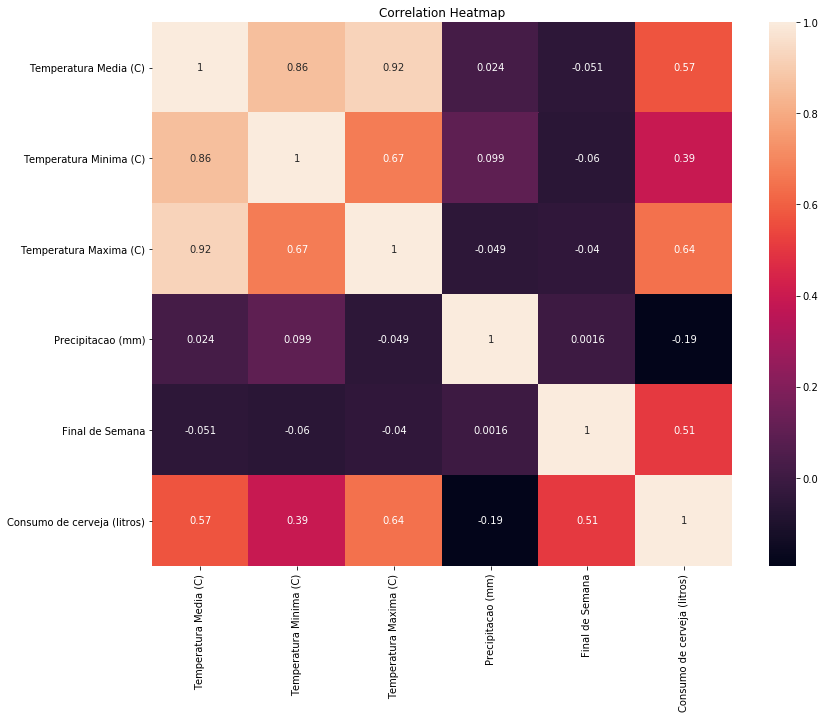

In [70]:
#SE crea matriz de correlación para ver que datos tienen mayor relación, Temperatura Maxima con Consumo de Cerveza
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

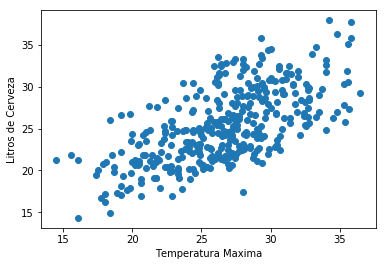

In [71]:
#Se separa data (X) e (Y) creando arreglos dobles y se grafican
x= df[["Temperatura Maxima (C)"]]
y= df[["Consumo de cerveja (litros)"]]
plt.scatter(x,y)
plt.xlabel("Temperatura Maxima")
plt.ylabel("Litros de Cerveza")
plt.show()

In [72]:
# Se separa la data en Train y Test
X_train,X_test, Y_train, Y_test=(train_test_split(x,y, test_size=1/3,random_state=0))

In [73]:
#Se crea el modelo lineal
regressor = LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
#Se crea predicción para conocer el compartamiento con data test
y_pred= regressor.predict(X_test)

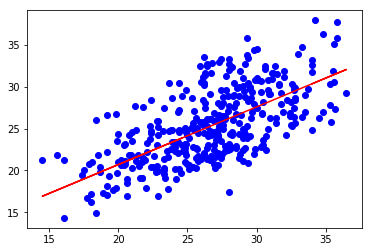

In [75]:
#Se grafica la data
plt.scatter(x,y,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red")
plt.show()

In [56]:
#Se vuelve a arreglo de 1d para poder calcular datos
x= df["Temperatura Maxima (C)"]
y= df["Consumo de cerveja (litros)"]
slope, intercept, r_value, p_vlaue, std_err = stats.linregress(x,y)

In [80]:
#R Más cerca a 1 o -1 quieres decir que el modelo es mejor
print(regressor.score(X_test, Y_test))

0.24980887966426035


In [76]:
#Se crea un ejemplo de predicción
prediction = regressor.predict([[15]])

In [77]:
#Se muestra prediccion
print(prediction)

[[17.25993552]]


In [78]:
regressor.score(X_test, Y_test)

0.24980887966426035